# 🍷 Case Study #1: Wine Quality

# 1.0 Introduction

In this case study, we will be analyzing 2 data sets, 1 on red wine samples and 1 on white wine samples from the north of Portugal. Each wine samples come with a quality rating based on the input variables listed in **2.2 Attribute Information** below. 

# 2.0 Data Set 

## 2.1 Source

> The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

> These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

[Reference: https://archive.ics.uci.edu/ml/datasets/Wine+Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

## 2.2 Attribute Information

Input variables (based on physicochemical tests): 
- 1 - fixed acidity 
- 2 - volatile acidity 
- 3 - citric acid 
- 4 - residual sugar 
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10 - sulphates 
- 11 - alcohol 

Output variable (based on sensory data): 
- 12 - quality (score between 0 and 10)

***

## 2.0 Asking Questions

Based on the data set, we have come up with these questions that we would like to answer:
- Is a certain type of wine (red or white) associated with higher quality?
- Do wines with higher alcoholic content receive better ratings?
- Do sweeter wines (more residual sugar) receive better ratings?
- What level of acidity is associated with the highest quality?

***

# 3.0 Assessing

In [1]:
# import libraries and load csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

red = pd.read_csv('/Users/katiehuang/Documents/Data Analytics/Udacity Data Analyst Nanodegree/Course 2 - Intro to Data Analysis/Case Study 1 - Wine Quality/winequality-red.csv', sep=';')
white = pd.read_csv('/Users/katiehuang/Documents/Data Analytics/Udacity Data Analyst Nanodegree/Course 2 - Intro to Data Analysis/Case Study 1 - Wine Quality/winequality-white.csv', sep=';')

In [2]:
# number of samples in each dataset
# number of columns in each dataset
red.shape, white.shape

((1599, 12), (4898, 12))

In [3]:
# features with missing values
red.info(), white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur-dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

(None, None)

In [4]:
# duplicate rows in the white wine dataset
white.duplicated().sum()

937

In [5]:
# number of unique values for quality in each dataset
red['quality'].nunique(), white['quality'].nunique()

(6, 7)

In [6]:
# mean density of the red wine dataset
red['density'].mean()

0.9967466791744831

***

# 4.0 Appending Data
First, import the necessary packages and load `winequality-red.csv` and `winequality-white.csv`.

## 4.1 Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function. Take a look and try it yourself.

In [7]:
# create color array for red dataframe
color_red = np.repeat('red',red.shape[0])

# create color array for white dataframe
color_white = np.repeat('white',white.shape[0])

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [8]:
# add red array to red df
red['color'] = color_red
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Do the same for the white dataframe and use `head()` to confirm the change.

In [9]:
# add white array to white df
white['color'] = color_white
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## 4.2 Rename Columns

Use [pandas' rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) function to change the `total_sulfur-dioxide` column label to `total_sulfur_dioxide`. You can check out this [Stack Overflow](https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe) page to help you.

In [10]:
# rename column
red.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace=True)

## 4.3 Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?)

In [11]:
# append dataframes
wine_df = red.append(white)

# view dataframe to check for success
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


***

# 5.0 EDA with Visuals
Create visualizations to answer the quiz questions below this notebook. 

## 5.1 Histograms for Various Features

### Question 1
Based on histograms of columns in this dataset, which of the following feature variables **appear skewed to the right?**
- Fixed Acidity
- Total Sulfur Dioxide
- pH
- Alcohol

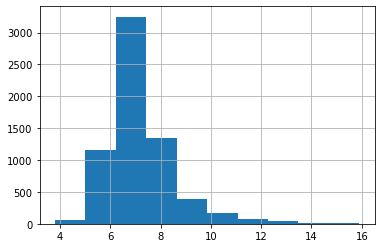

In [12]:
# Fixed Acidity
wine_df['fixed_acidity'].hist();

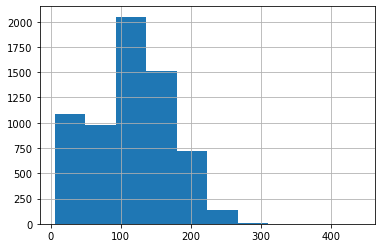

In [13]:
# Total Sulfur Dioxide
wine_df['total_sulfur_dioxide'].hist();

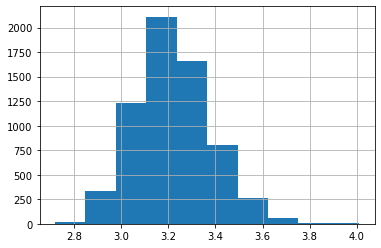

In [14]:
# pH
wine_df['pH'].hist();

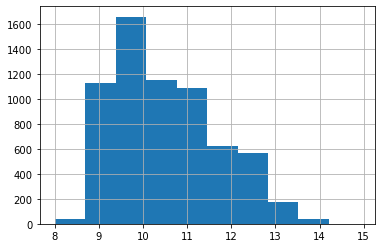

In [15]:
# Alcohol
wine_df['alcohol'].hist();

### Answer
Based on histograms of columns in this dataset, **Fixed Acidity** and **Alcohol** feature variables appear skewed to the right.

> The direction of skew is shown by the length of the tails of the distribution. A _**long right tail**_ means _**skewed to the right.**_

You can refer [here](https://knowledge.udacity.com/questions/485041) for further explanation. _[Note: The link brings you to a student-only Knowledge Portal in Udacity.]_

## 5.2 Scatterplots of Quality Against Various Features

### Question 2
Based on scatterplots of quality against different feature variables, which of the following is **most likely to have a positive impact on quality**? 
- Volatile Acidity
- Residual Sugar
- pH
- Alcohol

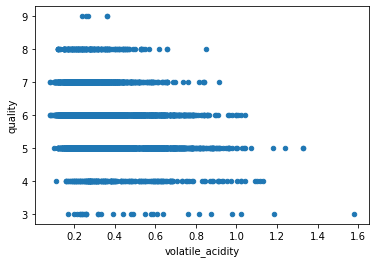

In [16]:
# Volatile Acidity
wine_df.plot(y='quality', x='volatile_acidity', kind='scatter');

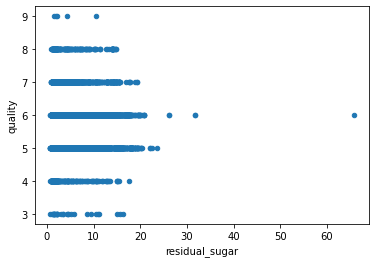

In [17]:
# Residual Sugar
wine_df.plot(y='quality', x='residual_sugar', kind='scatter');

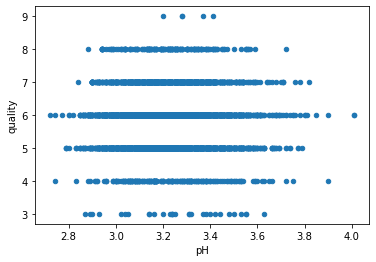

In [18]:
# pH
wine_df.plot(y='quality', x='pH', kind='scatter');

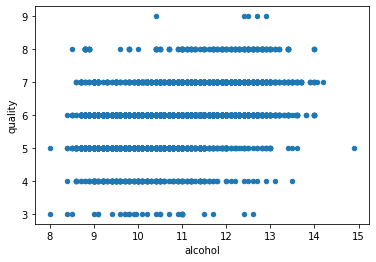

In [19]:
# Alcohol
wine_df.plot(y='quality', x='alcohol', kind='scatter');

### Answer
Based on scatterplots of quality against different feature variables, **Alcohol** is most likely to have a positive impact on quality.

Based on mentor Sanjeev Y's explanation [here](https://knowledge.udacity.com/questions/387387):
> The question is _**not**_ which variable has the _"most impact"_ on quality. The question is which variable is _"most likely to have a positive impact"_. This means we are looking for a **positive correlation and high value of correlation coefficient**.
Alcohol has a positve correlation and highest among all the positive correlation scatterplots. The higher the alcohol content, the higher the quality.

Here, we plot a Heatmap to show the correlation coefficient for the wine's feature variables

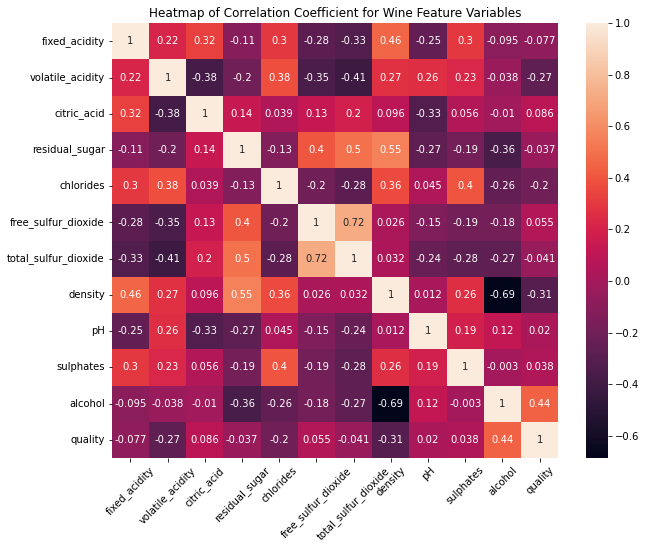

In [20]:
# plot heatmap for feature variables
corr = wine_df.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.title("Heatmap of Correlation Coefficient for Wine Feature Variables", size=12);

Referring to the bottom row of Quality, the feature variable with the most positive impact on Quality is **Alcohol** at 0.44 coefficient. The other features such as **Volatile Acidity, Residual Sugar and pH** have negative or less than 0.1 correlation.

***

# 6.0 Drawing Conclusions Using Groupby

## 6.1.1 Is a certain type of wine associated with higher quality?

For this question, we compare the average quality of red wine with the average quality of white wine with groupby. To do this, group by color and then find the mean quality of each group.

In [21]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### Answer

White wine is typically associated with higher quality at 5.877.

## 6.1.2 What level of acidity receives the highest average rating?

This question is tricky becase unlike the previous question, `color` is a categorical variable and can easily be grouped, however level of acidity/ `pH` is a quantitative variable without clear categories.

We can create categorical variable by creating our own categories using the quantitative variables.

First, create a new column called `acidity_levels` with these categories:

Acidity Levels:
- High: Lowest 25% of pH values
- Moderately High: 25% - 50% of pH values
- Medium: 50% - 75% of pH values
- Low: 75% - max pH value

Here, the data is being split at the 25th, 50th, and 75th percentile. 

After we create these four categories, we will be able to use groupby to get the mean quality rating for each acidity level.

In [22]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [23]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [24]:
# Labels for the four acidity level groups
bin_names = ['high','moderately high','medium','low'] # Name each acidity level category

In [25]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bins=bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderately high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderately high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [26]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity_levels')['quality'].mean()

acidity_levels
high               5.783343
moderately high    5.784540
medium             5.850832
low                5.859593
Name: quality, dtype: float64

### Answer

Wine is low acidity level/ `pH` receives the highest average rating, followed closely by medium acidity level. We can conclude that _the lower the acidity level, the higher the quality of wine_.


# 6.2 Drawing Conclusions Using Query

## 6.2.1 Do wines with higher alcoholic content receive better ratings?

To answer this question, use query to create two groups of wine samples:

- Low alcohol (samples with an alcohol content less than the median)
- High alcohol (samples with an alcohol content greater than or equal to the median)

Then, find the mean quality rating of each group.

In [27]:
# get the median amount of alcohol content
wine_df['alcohol'].median()

10.3

In [28]:
# select samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [29]:
# get mean quality rating for the low alcohol group
low_alcohol['quality'].mean()

5.475920679886686

In [30]:
# get mean quality rating for the high alcohol group
high_alcohol['quality'].mean()

6.146084337349397

### Answer

Wines with higher alcohol content receives better ratings.

## 6.2.2 Do sweeter wines receive better ratings?

Similarly, use the median method above to find the answer.

In [31]:
# get the median amount of residual sugar
wine_df['residual_sugar'].median()

3.0

In [32]:
# select samples with residual sugar less than the median
low_sugar = wine_df.query('residual_sugar < 3.0')

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df.query('residual_sugar >= 3.0')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [33]:
# get mean quality rating for the low sugar group
low_sugar['quality'].mean()

5.808800743724822

In [34]:
# get mean quality rating for the high sugar group
high_sugar['quality'].mean()

5.82782874617737

### Answer

Sweeter wines with higher sugar content receives higher rating although there is a close match with lower sugar content.

***

# 7.0 Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [35]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 7.1 Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. 

In [36]:
# Use query to select each group and get its mean quality
# Get overall median for alcohol
median = wine_df['alcohol'].median()

# Get subsets for data with < and >= alcohol median
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

# Get mean for quality with low and high alcohol
mean_quality_low_alcohol = low['quality'].mean()
mean_quality_high_alcohol = high['quality'].mean()

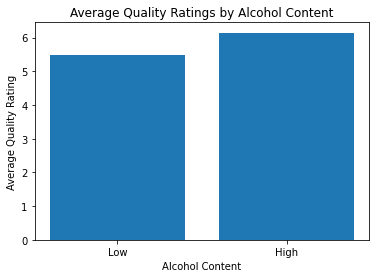

In [37]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low_alcohol, mean_quality_high_alcohol]
labels = ['Low', 'High']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### Answer

From the bar chart above, wines with higher alcohol content receives a higher quality rating.

## 7.2 Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [38]:
# Use query to select each group and get its mean quality
# Get the median for residual sugar
median = wine_df['residual_sugar'].median()

# Get the subsets for < and >= median
low_sugar = wine_df.query('residual_sugar < {}'.format(median))
high_sugar = wine_df.query('residual_sugar >= {}'.format(median))

# Get the mean for quality
mean_quality_low_sugar = low_sugar['quality'].mean()
mean_quality_high_sugar = high_sugar['quality'].mean()

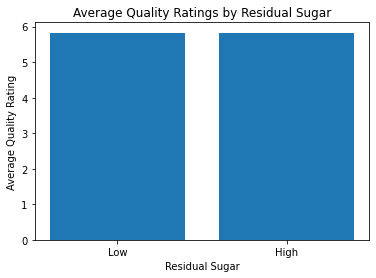

In [39]:
# Create a bar chart with proper labels
locations = [1,2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]
labels = ['Low', 'High']

plt.bar(locations, heights, tick_label = labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### Answer
From the above bar chart, it is difficult to properly determine the impact of residual sugar on the quality rating. We will create a line chart below to see whether we can get a better conclusion.

## 7.3 What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [41]:
# Use groupby to get the mean quality for each acidity level
acidity_level_mean = wine_df.groupby('acidity_levels')['quality'].mean()
acidity_level_mean

acidity_levels
high               5.783343
moderately high    5.784540
medium             5.850832
low                5.859593
Name: quality, dtype: float64

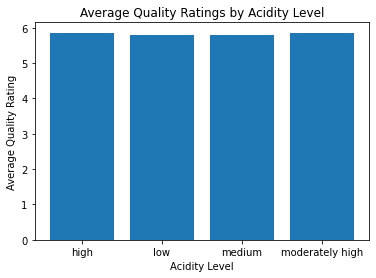

In [42]:
# Create a bar chart with proper labels
locations = [2,3,4,1]
heights = acidity_level_mean
labels = ['low','medium','moderately high','high']

plt.bar(locations, heights, tick_label = labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

### Answer
Similarly, the above bar chart is also not able to provide any meaningful answer as to which level of acidity provides a lower or higher quality rating.

## 7.4 Bonus: Create a line plot for the data in 7.2 and 7.3
You can use pyplot's [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function for this.

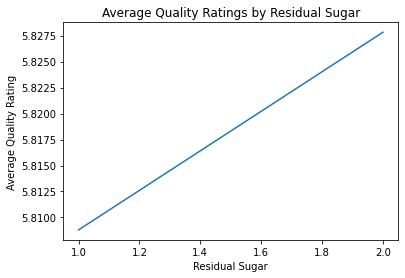

In [43]:
# Create a line with proper labels
import matplotlib.pyplot as plt
%matplotlib inline
locations = [1,2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]

plt.plot(locations, heights)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### Answer
With the line chart above, we can see the relationship between residual sugar and quality rating better. _The higher the residual sugar, the higher the quality rating._

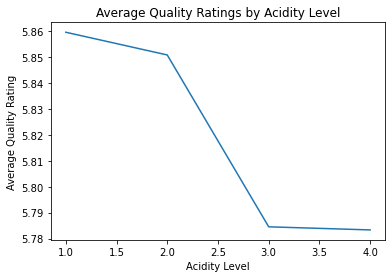

In [44]:
# Create a line chart with proper labels
import matplotlib.pyplot as plt
%matplotlib inline
locations = [1,2,3,4]
heights = [5.859593, 5.850832, 5.784540, 5.783343]

plt.plot(locations, heights)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

### Answer
With the line chart above, we can see _the higher the acidity level or `pH`, the lower the quality rating of the wine._

***

# 8.0 Conclusion

Let's revisit our questions and include our observations from the analysis.

**1. Is a certain type of wine (red or white) associated with higher quality?**

> White wine is typically associated with higher quality.

**2. Do wines with higher alcoholic content receive better ratings?**

> Wines with higher alcohol content generally receives better quality ratings.

**3. Do sweeter wines (more residual sugar) receive better ratings?**

> Sweeter wines with higher sugar content receives higher rating although there is close match with lower sugar content.

**4. What level of acidity is associated with the highest quality?**
> Wine with low acidity level/`pH` receives the highest average rating, followed closely by medium acidity level. We can conclude that _the lower the acidity level, the higher the quality of wine._

Thank you for reading my analysis!